In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

In [4]:
import jax
from housemaze import env as maze
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image_dict = utils.load_image_dict()

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl


In [6]:
char2key, task_group_set, task_objects = mazes.get_group_set(3)
char2key

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


{'A': np.int32(26),
 'B': np.int32(40),
 'C': np.int32(47),
 'D': np.int32(43),
 'E': np.int32(25),
 'F': np.int32(30),
 'G': np.int32(29),
 'H': np.int32(27)}

((224, 256, 3),
 ['empty',
  'wall',
  'apple_sliced',
  'spoon',
  'onion_sliced_cooked',
  'onion_cooked',
  'lettuce_sliced_cooked',
  'bowl',
  'lettuce_dirty',
  'orange_dirty',
  'tomato_dirty',
  'onion_sliced',
  'knife_dirty',
  'potato',
  'pot_dirty',
  'potato_dirty',
  'mug_dirty',
  'apple_dirty',
  'tomato_sliced_cooked',
  'fork_dirty',
  'microwave_on',
  'plates',
  'pan_dirty',
  'onion',
  'orange_sliced',
  'glass_filled',
  'microwave',
  'tomato',
  'potato_sliced',
  'orange',
  'pot',
  'apple',
  'onion_dirty',
  'fridge',
  'plates_dirty',
  'tomato_cooked',
  'stove_on',
  'sink_on',
  'tomato_sliced',
  'pan',
  'stove',
  'potato_cooked',
  'bowl_dirty',
  'knife',
  'lettuce_cooked',
  'glass',
  'lettuce',
  'fork',
  'potato_sliced_cooked',
  'lettuce_sliced',
  'sink'])

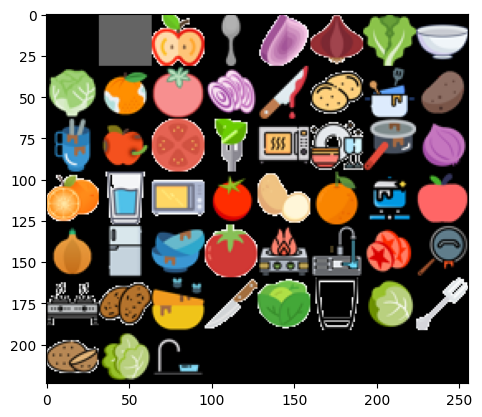

In [7]:
image = renderer.create_image_grid_from_image_tensor(image_dict['images'], max_cols=8)
plt.imshow(image)

image.shape, image_dict['keys']

In [8]:
image_dict['keys']

['empty',
 'wall',
 'apple_sliced',
 'spoon',
 'onion_sliced_cooked',
 'onion_cooked',
 'lettuce_sliced_cooked',
 'bowl',
 'lettuce_dirty',
 'orange_dirty',
 'tomato_dirty',
 'onion_sliced',
 'knife_dirty',
 'potato',
 'pot_dirty',
 'potato_dirty',
 'mug_dirty',
 'apple_dirty',
 'tomato_sliced_cooked',
 'fork_dirty',
 'microwave_on',
 'plates',
 'pan_dirty',
 'onion',
 'orange_sliced',
 'glass_filled',
 'microwave',
 'tomato',
 'potato_sliced',
 'orange',
 'pot',
 'apple',
 'onion_dirty',
 'fridge',
 'plates_dirty',
 'tomato_cooked',
 'stove_on',
 'sink_on',
 'tomato_sliced',
 'pan',
 'stove',
 'potato_cooked',
 'bowl_dirty',
 'knife',
 'lettuce_cooked',
 'glass',
 'lettuce',
 'fork',
 'potato_sliced_cooked',
 'lettuce_sliced',
 'sink']

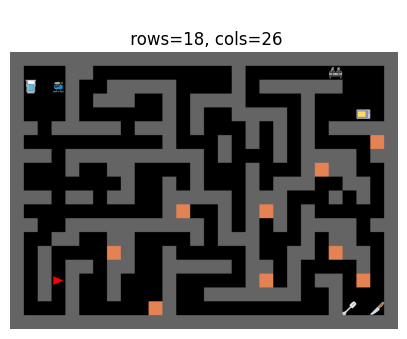

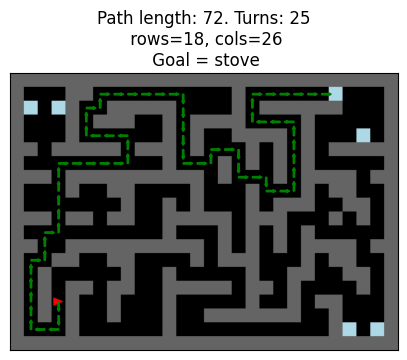

In [290]:
def render_maze(maze_str, include_objects=True):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(
        *level_init, image_dict,
        include_objects=include_objects,
        spawn_locs=utils.from_str_spawning(maze_str)
    )
    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(image)
    grid = level_init[0]
    title = f"\n rows={grid.shape[0]}, cols={grid.shape[1]}"
    ax.set_title(title)
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])

def render_path(maze_str, goal, ax=None, rng=None, include_objects=False, include_spawn=True):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(
        *level_init, image_dict,
        include_objects=include_objects,
        spawn_locs=utils.from_str_spawning(maze_str) if include_spawn else None)
    grid = level_init[0]
    path = utils.find_optimal_path(grid, level_init[1], np.array([goal]), rng=rng)
    actions = utils.actions_from_path(path)
    changes = utils.count_action_changes(actions[:-1])

    if ax is None:
        fig, ax = plt.subplots(1, figsize=(5, 5))
    title = f"Path length: {len(path)}. Turns: {sum(changes)}"
    title += f"\n rows={grid.shape[0]}, cols={grid.shape[1]}"
    title += f"\n Goal = {image_dict['keys'][goal]}"
    ax.set_title(title)
    renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2], ax=ax)

render_maze(mazes.big_m3_maze1)
render_path(mazes.big_m3_maze1, goal=task_objects[1], include_objects=False, include_spawn=False)

# render_maze(mazes.maze1)
# render_maze(mazes.maze2)
# render_maze(mazes.maze3)
# render_maze(mazes.maze4)

# Practice maze

Version 3


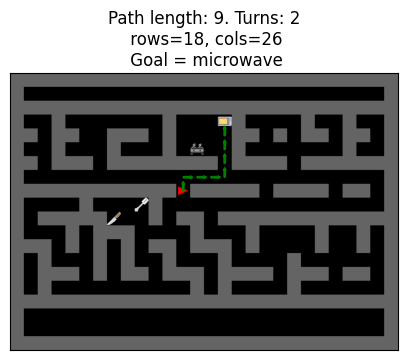

In [309]:
print("Version 3")

render_path(mazes.big_practice_maze, goal=task_objects[0], include_objects=True)

# Manipulation 1: Shortcut

Version 3


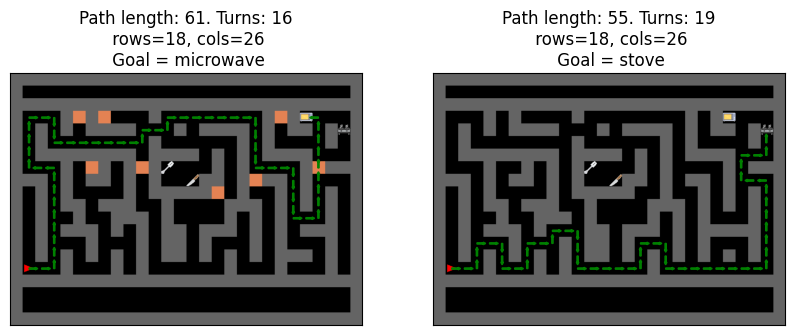

In [327]:
print("Version 3")
m = utils.combine_horizontally(
    utils.cut(utils.reverse(mazes.StandardMaze2, vertical=False, horizontal=False), n=0),
    utils.cut(utils.reverse(mazes.StandardMaze3, vertical=False), n=0))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
render_path(mazes.big_m1_maze3, goal=task_objects[0], ax=axs[0], include_objects=True)


render_path(mazes.big_m1_maze3_shortcut, goal=task_objects[1], ax=axs[1], include_objects=True)


# Manipulation 2: Faster when on-path but further than off-path but closer

VERSION 2


[]

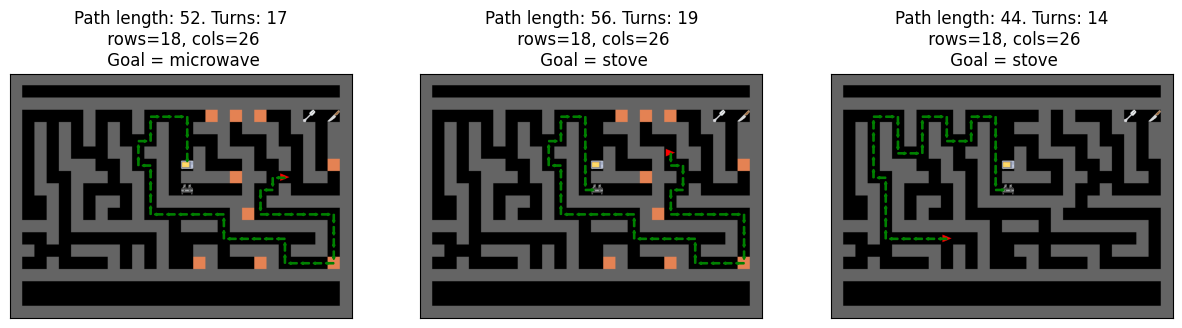

In [328]:
print("VERSION 2")

m = utils.combine_horizontally(
    utils.cut(utils.reverse(mazes.StandardMaze2), n=0),
    utils.cut(utils.reverse(mazes.StandardMaze), n=0))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
render_path(mazes.big_m2_maze2, goal=task_objects[0], ax=axs[0], include_objects=True)

render_path(mazes.big_m2_maze2_onpath, goal=task_objects[1], ax=axs[1], include_objects=True)
render_path(mazes.big_m2_maze2_offpath, goal=task_objects[1], ax=axs[2], include_objects=True)

utils.compare_mazes(mazes.big_m2_maze2, mazes.big_m2_maze2_offpath)
# # offtask = task_objects[1]


# Manipulation 3: Reusing longer of two paths if training path

In [244]:
# print("VERSION 1")
# # version 1
# maze5 = """
# C.#......B...
# .D#.######...
# .##....#.....
# ..####.#.....
# ...#.#.#.###A
# .#.#.#.#...#.
# ##...#.###.##
# ...#...#.#...
# ...#..##.###.
# ##.##.#....#.
# ...#..#.##...
# .######..#E.F
# .>.......#...

# """.strip()

# maze5 = mazes.maze5

# render_path(maze5, goal=task_objects[0])
# render_path(maze5, goal=task_objects[1])


# # # offtask = task_objects[1]


VERSION 2


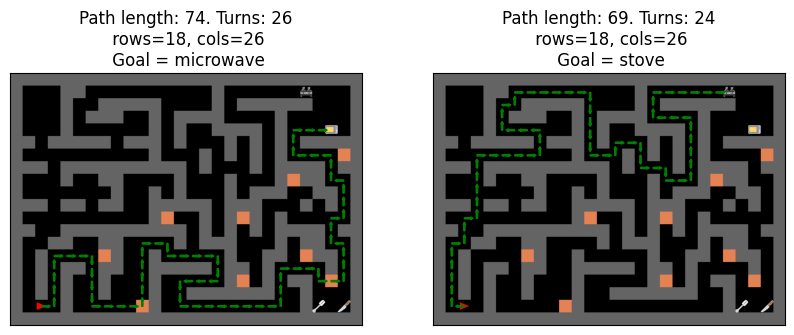

In [326]:
print("VERSION 2")

# m = utils.combine_mazes_horizontally(utils.reverse(mazes.maze3), mazes.maze5)

# m = """
# ...##.........#......B...
# D.C#..####....#.######...
# ...#.###.#.####....#.....
# ...#.....#.#..####.#...A.
# #.#####.##.#...#.#.#.####
# .........#...#.#.#.#.....
# ##.#########.#...#.####.#
# ...#..##...#...#...#.##..
# .......#.#.#...#.###..##.
# ##.##.##.#####.###...#.#.
# .........#...#.#.#.#.....
# #..#########.#.#.#.####.#
# ..##..##...#.###...#.##..
# .#.....#.#.....#..##..##.
# .#.##.##.#####.##.#....#.
# .#>#..#..#.....#..#.##...
# .#.#..#..#..#######..#...
# ...#.....#...........#E.F
# """.strip()
# render_maze(m)
# m = utils.insert(m, 9, '.')
m = """
...##..........#......B...
D.C#..#####....#.#######..
...#.###..#.####....#..#..
...#......#...###.#.#...A.
#.#####.###.#.#.#.#.#.####
..........#.#.#.#.#.#.....
##.##########.#.#.#.####.#
...#..##....#.#.....#.##..
.......#..#.#...#.###..##.
##.##.##..#####.###...#.#.
..........#...#.#.#.#.....
#..##########.#.#.#.####.#
..##..##....#.###...#.##..
.#>....#..#.....#..##..##.
.#.##.##..#####.##.#....#.
.#.#..#...#.....#..#.##...
.#.#..#...#..#######..#...
...#......#...........#E.F
"""

# print(m)
# render_maze(m)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# render_path(m, goal=task_objects[0], ax=axs[0])
# render_path(m, goal=task_objects[1], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
render_path(mazes.big_m3_maze1, goal=task_objects[0], ax=axs[0], include_objects=True)
render_path(mazes.big_m3_maze1, goal=task_objects[1], ax=axs[1], include_objects=True)



# # offtask = task_objects[1]


# Manipulation 4: probing for planning near goal [deleted]

In [288]:
# rev = partial(mazes.reverse, horizontal=True, vertical=False)


# maze6 = """
# E..#.....#A.B
# ......##.#...
# F..#..#..#.#.
# ####.##.##.##
# ...#.#.....#.
# .#...##......
# .###########.
# ...#......#..
# .#.##.##.##.#
# .#.#..#...###
# ##...####....
# .>.#.##.##...
# ...#.....#C.D
# """.strip()

# maze6_flipped_offtask = """
# E..#.....#A..
# ......##.#...
# F..#..#..#.#.
# ####.##.##.##
# ...#.#.....#.
# .#...##......
# .###########.
# ...#......#B.
# .#.##.##.##.#
# .#.#..#...###
# ##...####....
# .>.#.##.##...
# ...#.....#C.D
# """.strip()



# print("Original map")
# render_path(maze6, goal=task_objects[1])
# render_path(maze6_flipped_offtask, goal=task_objects[1])

# print("train")
# render_path(rev(maze6), goal=task_objects[0])
# print("test 1")
# render_path(rev(maze6), goal=task_objects[1])
# print("test 2")
# render_path(rev(maze6_flipped_offtask), goal=task_objects[1])


# # # # offtask = task_objects[1]
